# Week 12 - Kernel Methods

Learning contents:
* Kernel Regression
    * Compute Gram Matrix
    * Estimate the target values for a new set of data points
    * Plot the (x_new, t_new)-pairs on top of the original data
    * Play around with the kernel $\sigma$. How does the fit look using $\sigma=1$ as compared to  $\sigma=10$?


In [1]:
# Dependencies
import numpy as np
import pandas as pd
import scipy
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set();

# 1) Kernel Regression

We'll be working with two variable from the [Boston housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

x = data[:,12] # LSTAT: % lower status of the population.
t = target # MEDV: Median value of owner-occupied homes in $1000s.

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/cz/mx5m39wn22b9z03lv1qtl7cm0000gn/T/ipykernel_43390/3533199213.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


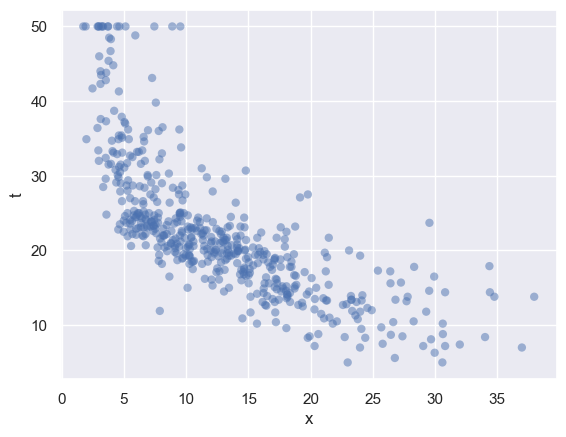

In [3]:
def plot_scatter(data, target, alpha=0.5, legend=True):
    scatter = plt.scatter(data, target,  edgecolor='none', alpha=alpha)
    plt.xlabel('x')
    plt.ylabel('t')

# Let's plot all the data in 2D
plot_scatter(x, t)

## 1.1) Compute the kernel gram matrix
Do it using the Gaussian Kernel based on Euclidean distance.

Use $\sigma = 2$

First, perform the computation for the 5 first samples. Then do it for all samples. What is the shape of the Gram matrix for all samples?

In [5]:
sigma = 2

In [7]:
# Compute Gram matrix for 5 first samples

# Take first 5 samples
x_subset = x[:5]

# Compute Euclidean distances
diff = x_subset[:, np.newaxis] - x_subset[np.newaxis, :]
squared_distances = diff ** 2

# Apply Gaussian kernel formula
K_subset = np.exp(-squared_distances / (2 * sigma**2))

print("Gram matrix for first 5 samples:")
print(K_subset)

Gram matrix for first 5 samples:
[[1.         0.11495667 0.89331814 0.59440166 0.98480414]
 [0.11495667 1.         0.03823467 0.0081887  0.16291731]
 [0.89331814 0.03823467 1.         0.86198923 0.80957165]
 [0.59440166 0.0081887  0.86198923 1.         0.48967543]
 [0.98480414 0.16291731 0.80957165 0.48967543 1.        ]]


In [ ]:
# Compute Gram matrix for all samples

# Compute Euclidean distances
diff = x[:, np.newaxis] - x[np.newaxis, :]
squared_distances = diff ** 2

# Apply Gaussian kernel formula
K = np.exp(-squared_distances / (2 * sigma**2))

print("Gram matrix for all samples:")
print(K)

Gram matrix for all samples:
[[1.         0.11495667 0.89331814 ... 0.94700586 0.7548396  0.3495006 ]
 [0.11495667 1.         0.03823467 ... 0.21626517 0.41294123 0.82000077]
 [0.89331814 0.03823467 1.         ... 0.7232412  0.47221896 0.15679556]
 ...
 [0.94700586 0.21626517 0.7232412  ... 1.         0.91557774 0.53408515]
 [0.7548396  0.41294123 0.47221896 ... 0.91557774 1.         0.78270454]
 [0.3495006  0.82000077 0.15679556 ... 0.53408515 0.78270454 1.        ]]


## 1.2) Estimate the target values for a new set of data points
Use a regularisation term of lambda = 0.001

In [11]:
l = 0.001 # lambda
sigma = 2
x_new = np.linspace(0, 40, 100) # Range in which to compute estimated values

In [13]:
# Kernel regression formula: t_new = k(x_new, x) * (K + λI)^(-1) * t
# We reuse the Gram matrix K computed in 1.1

# Compute kernel matrix between new points and training points
diff_new = x_new[:, np.newaxis] - x[np.newaxis, :]
k_new = np.exp(-diff_new**2 / (2 * sigma**2))

# Add regularization to K and solve for alpha
K_reg = K + l * np.eye(len(x))
alpha = np.linalg.solve(K_reg, t)

# Compute predictions for new points
t_new = k_new @ alpha

print(f"t_new range: [{t_new.min():.2f}, {t_new.max():.2f}]")

t_new range: [6.41, 70.66]


## 1.3) Plot the (x_new, t_new)-pairs on top of the original data
Hint: You can use `seaborn.lineplot`

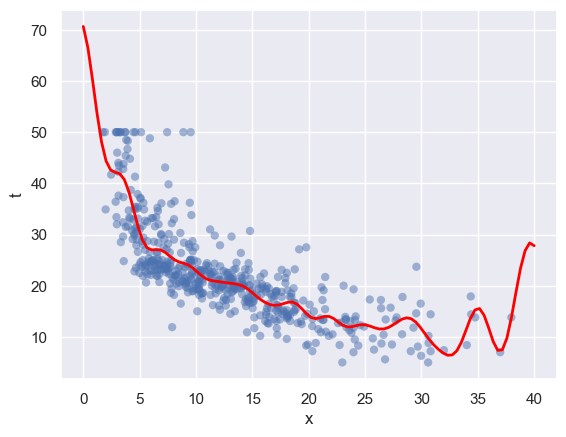

In [18]:
plot_scatter(x, t, alpha=0.5)

sns.lineplot(x=x_new, y=t_new, color='red', linewidth=2)

plt.show()

## 1.4) Play around with the kernel $\sigma$. How does the fit look using $\sigma=1$ as compared to  $\sigma=10$?

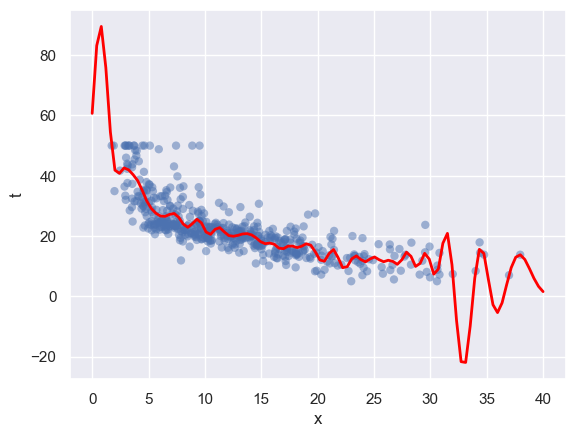

In [26]:
sigma = 1

diff = x[:, np.newaxis] - x[np.newaxis, :]
squared_distances = diff ** 2

K = np.exp(-squared_distances / (2 * sigma**2))

diff_new = x_new[:, np.newaxis] - x[np.newaxis, :]
k_new = np.exp(-diff_new**2 / (2 * sigma**2))

K_reg = K + l * np.eye(len(x))
alpha = np.linalg.solve(K_reg, t)

t_new = k_new @ alpha

plot_scatter(x, t, alpha=0.5)

sns.lineplot(x=x_new, y=t_new, color='red', linewidth=2)

plt.show()

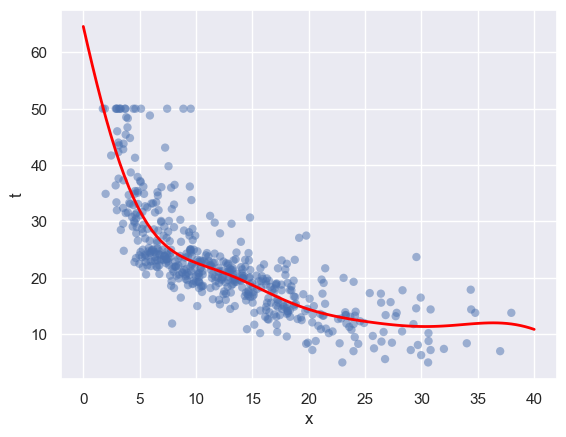

In [27]:
sigma = 10

diff = x[:, np.newaxis] - x[np.newaxis, :]
squared_distances = diff ** 2

K = np.exp(-squared_distances / (2 * sigma**2))

diff_new = x_new[:, np.newaxis] - x[np.newaxis, :]
k_new = np.exp(-diff_new**2 / (2 * sigma**2))

K_reg = K + l * np.eye(len(x))
alpha = np.linalg.solve(K_reg, t)

t_new = k_new @ alpha

plot_scatter(x, t, alpha=0.5)

sns.lineplot(x=x_new, y=t_new, color='red', linewidth=2)

plt.show()

Results when σ = 10 are way more smoother, but it looks it can underfit , while when σ = 1, it is the opposite. The model has more 'ups and downs' and it looks like it can overfit.